In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


c:\users\wisol\appdata\local\programs\python\python37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
data=pd.read_csv('Fremont_Bridge_Bicycle_Counter.csv', index_col='Date',parse_dates=True)
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


In [3]:
data.dropna().describe()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
count,137777.000000,137777.000000,137777.000000
mean,112.490771,51.267004,61.223767
std,143.132406,65.992109,89.076846
min,0.000000,0.000000,0.000000
25%,14.000000,6.000000,7.000000
50%,61.000000,28.000000,30.000000
75%,147.000000,69.000000,75.000000
max,1097.000000,698.000000,850.000000


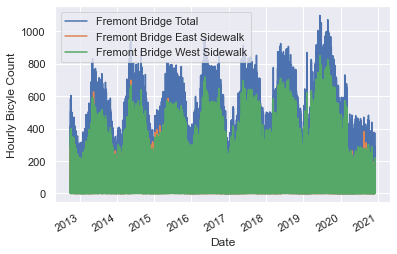

In [4]:
# Visualizing the data
import seaborn; seaborn.set()
data.plot()
plt.ylabel('Hourly Bicyle Count');

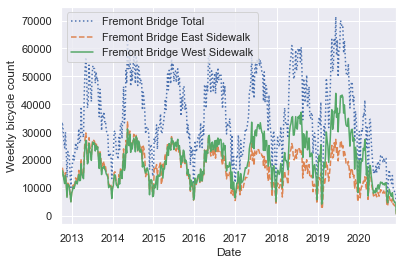

In [5]:
weekly=data.resample('W').sum()
weekly.plot(style=[':','--','-'])
plt.ylabel('Weekly bicycle count');

Text(0, 0.5, 'mean hourly count')

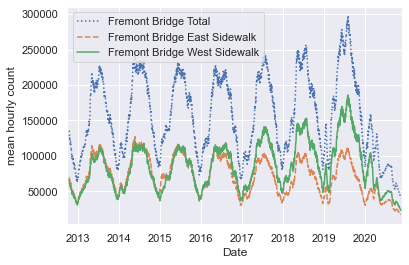

In [6]:
daily=data.resample('D').sum()
daily.rolling(30,center=True).sum().plot(style=[':','--','-'])
plt.ylabel('mean hourly count')

Text(0, 0.5, 'mean hourly count')

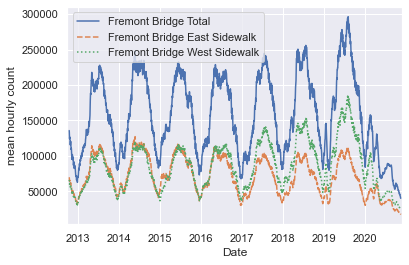

In [7]:
daily=data.resample('D').sum()
daily.rolling(30,center=True).sum().plot(style=['-','--',':'])
plt.ylabel('mean hourly count')

In [8]:
daliy.rolling(50,center=True,win_type='gaussian').cum(std=10).plot(style=['-',':','--'])

NameError: name 'daliy' is not defined

In [9]:
daily.rolling(50,center=True,win_type='gaussian').cum(std=10).plot(style=['-',':','--'])

AttributeError: 'Window' object has no attribute 'cum'

<AxesSubplot:xlabel='Date'>

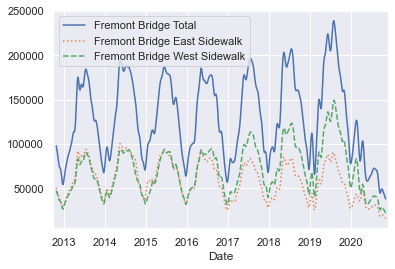

In [10]:
daily.rolling(50,center=True,win_type='gaussian').sum(std=10).plot(style=['-',':','--'])

<AxesSubplot:xlabel='time'>

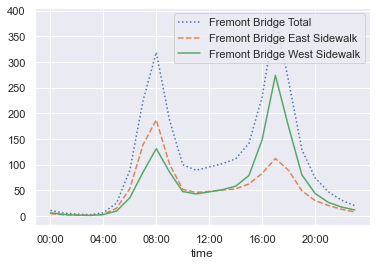

In [11]:
by_time=data.groupby(data.index.time).mean()
hourly_tick=4*60*60*np.arange(6)
by_time.plot(xticks=hourly_tick, style=[':','--','-'])

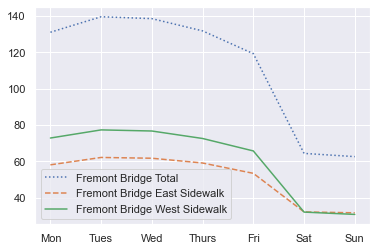

In [12]:
by_weekday=data.groupby(data.index.dayofweek).mean()
by_weekday.index=['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-']);

In [13]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()

AttributeError: 'DataFrame' object has no attribute 'ix'

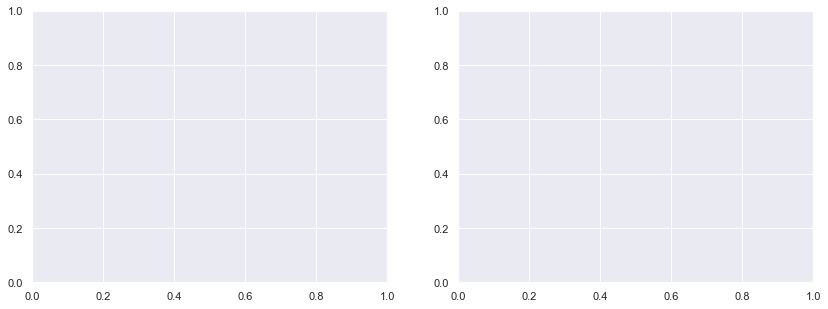

In [14]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.ix['Weekday'].plot(ax=ax[0], title='Weekdays', xticks=hourly_ticks, style=[':', '--', '-'])
by_time.ix['Weekend'].plot(ax=ax[1], title='Weekends', xticks=hourly_ticks, style=[':', '--', '-']);

TypeError: Cannot index by location index with a non-integer key

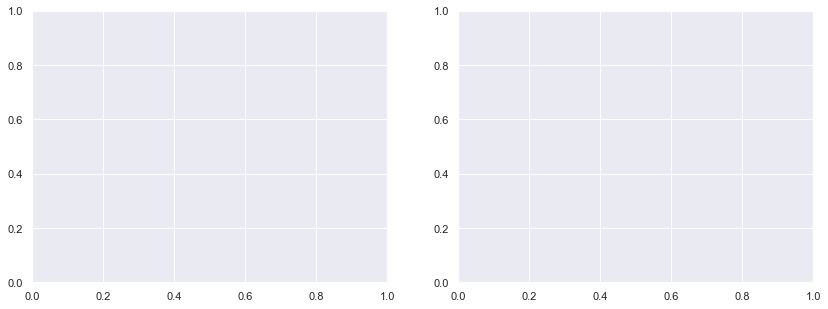

In [15]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.iloc['Weekday'].plot(ax=ax[0], title='Weekdays', xticks=hourly_ticks, style=[':', '--', '-'])
by_time.iloc['Weekend'].plot(ax=ax[1], title='Weekends', xticks=hourly_ticks, style=[':', '--', '-']);

NameError: name 'hourly_ticks' is not defined

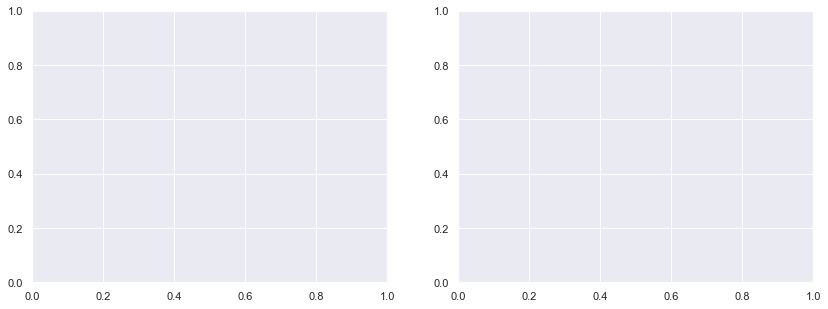

In [16]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays', xticks=hourly_ticks, style=[':', '--', '-'])
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends', xticks=hourly_ticks, style=[':', '--', '-']);

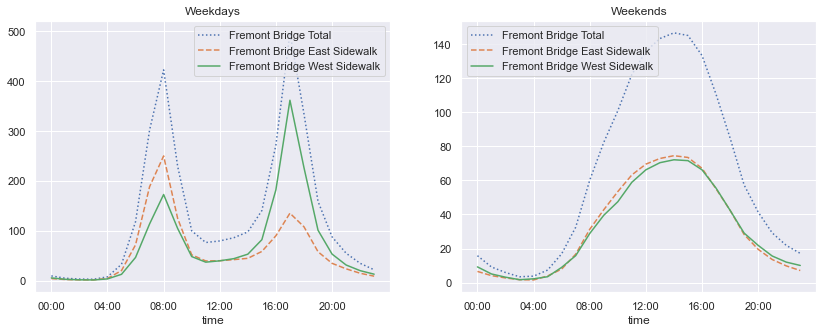

In [17]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays', xticks=hourly_tick, style=[':', '--', '-'])
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends', xticks=hourly_tick, style=[':', '--', '-']);

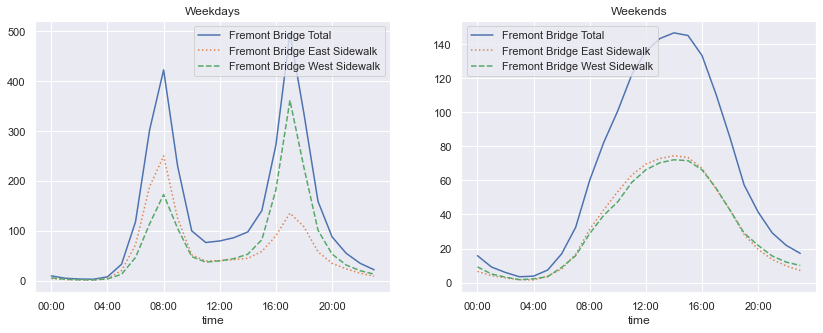

In [18]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays', xticks=hourly_tick, style=['-', ':', '--'])
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends', xticks=hourly_tick, style=['-', ':', '--']);